In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename_B1 = 'Meuse_LT_100m_B1_yod.csv' #year of disturbance values pixels per year
filname_B2 = 'Meuse_LT_100m_B2_endYr.csv'

area_threshold = 50e6

In [152]:
df_B1 = pd.read_excel('catchment_table_GEEid_yod.xlsx') 

#xlsx = pd.read_excel('catchment_table_w_GEE_ID.xlsx')

In [153]:
years = np.arange(1985, 2022, 1)
print(len(years))

37


Text(0.5, 1.0, 'Linear relation btw amt of pixels undisturbed (yod = 0) and area')

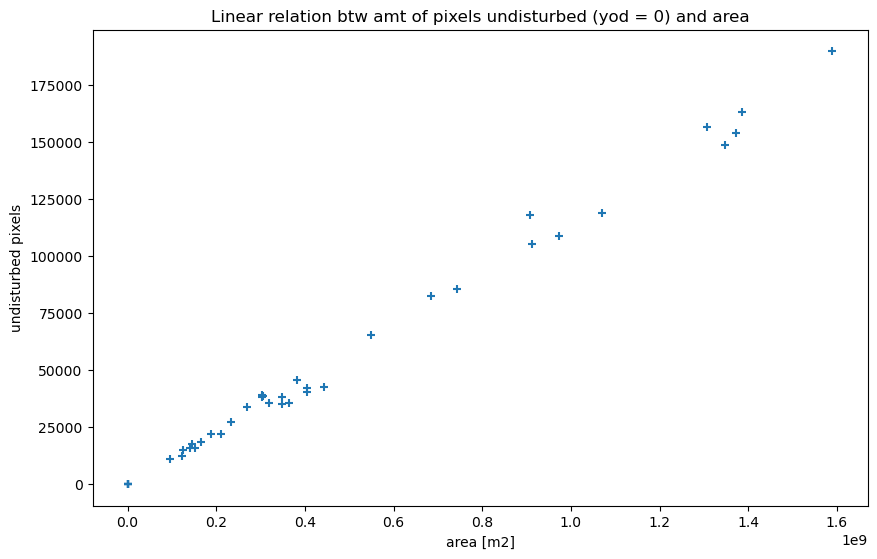

In [157]:
plt.figure(figsize=(10,6.18))
plt.scatter(df_B1_sorted.area2, df_B1_sorted.yod_00, marker='+')
plt.ylabel('undisturbed pixels')
plt.xlabel('area [m2]')
plt.title('Linear relation btw amt of pixels undisturbed (yod = 0) and area')

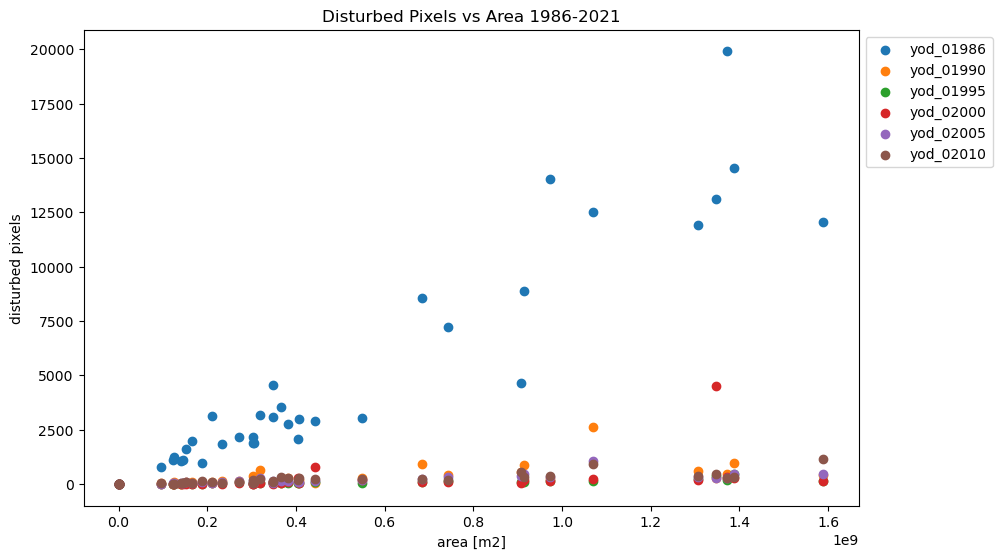

In [158]:
disturbed_keys86 = ['yod_01986', 'yod_01987', 'yod_01988', 'yod_01989',
       'yod_01990', 'yod_01991', 'yod_01992', 'yod_01993', 'yod_01994',
       'yod_01995', 'yod_01996', 'yod_01997', 'yod_01998', 'yod_01999',
       'yod_02000', 'yod_02001', 'yod_02002', 'yod_02003', 'yod_02004',
       'yod_02005', 'yod_02006', 'yod_02007', 'yod_02008', 'yod_02009',
       'yod_02010', 'yod_02011', 'yod_02012', 'yod_02013', 'yod_02014',
       'yod_02015', 'yod_02016', 'yod_02017', 'yod_02018', 'yod_02019',
       'yod_02020', 'yod_02021']

selected_disturbed_keys86 = [disturbed_keys86[0], disturbed_keys86[4], disturbed_keys86[9], disturbed_keys86[14], disturbed_keys86[19], disturbed_keys86[24]]   

df_B1_sorted = df_B1.sort_values('area_m2')

plt.figure(figsize=(10,6.18))
for keys in selected_disturbed_keys86:
    plt.scatter(df_B1_sorted.area2, df_B1_sorted.loc[:, keys], label=keys)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.yscale('linear')
plt.ylabel('disturbed pixels')
plt.xlabel('area [m2]')
plt.title('Disturbed Pixels vs Area 1986-2021');

#TO DO: plot is too busy and doesnt tell much 

Text(0.5, 1.0, 'Disturbed Pixels vs Area 1987-2021')

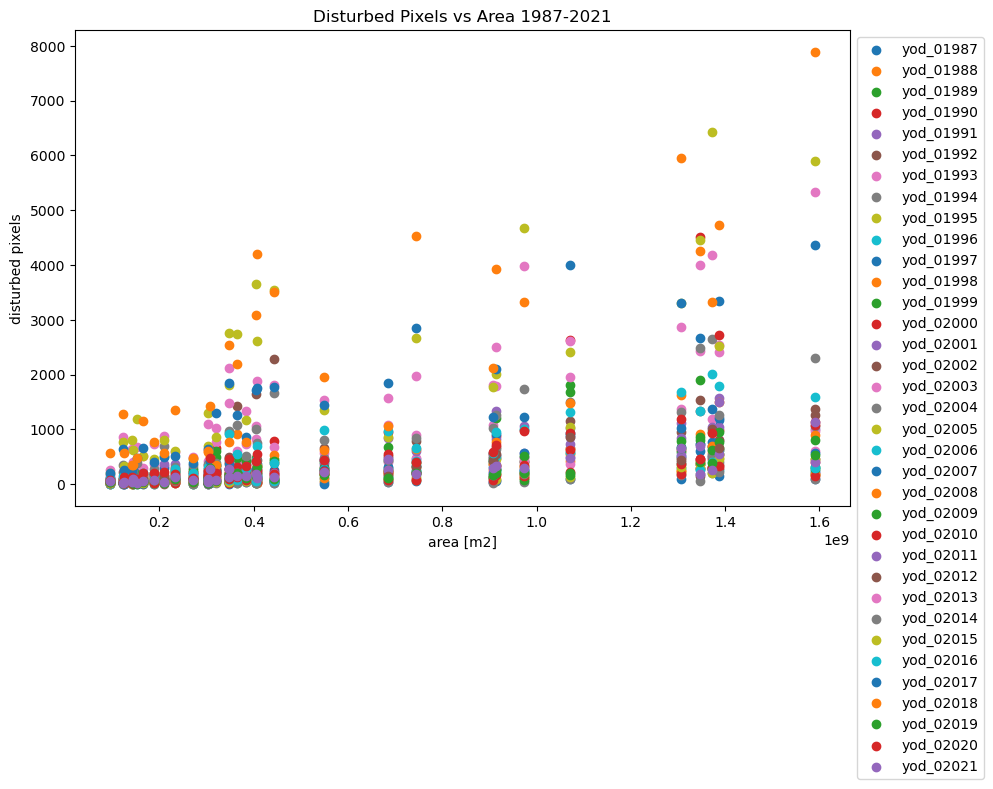

In [159]:
disturbed_keys87 = ['yod_01987', 'yod_01988', 'yod_01989',
       'yod_01990', 'yod_01991', 'yod_01992', 'yod_01993', 'yod_01994',
       'yod_01995', 'yod_01996', 'yod_01997', 'yod_01998', 'yod_01999',
       'yod_02000', 'yod_02001', 'yod_02002', 'yod_02003', 'yod_02004',
       'yod_02005', 'yod_02006', 'yod_02007', 'yod_02008', 'yod_02009',
       'yod_02010', 'yod_02011', 'yod_02012', 'yod_02013', 'yod_02014',
       'yod_02015', 'yod_02016', 'yod_02017', 'yod_02018', 'yod_02019',
       'yod_02020', 'yod_02021']
df_B1_sorted = df_B1.sort_values('area2')
plt.figure(figsize=(10,6.18))
for keys in disturbed_keys87:
    plt.scatter(df_B1_sorted.area2.where(df_B1_sorted.area2>1e7), df_B1_sorted.loc[:, keys], label=keys)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.yscale('linear')
plt.ylabel('disturbed pixels')
plt.xlabel('area [m2]')
plt.title('Disturbed Pixels vs Area 1987-2021')

#plot 

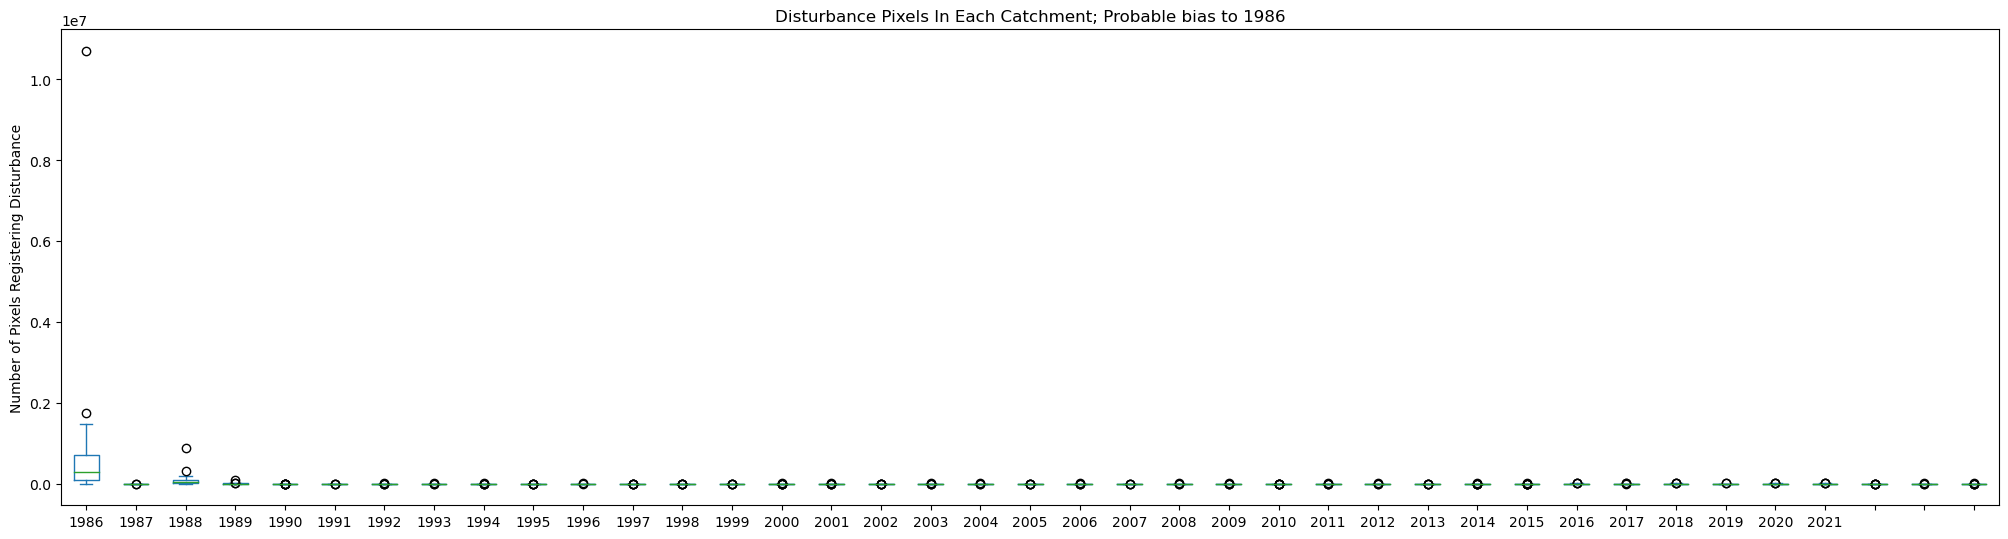

In [160]:
ylabel = 'Number of Pixels Registering Disturbance'

ax = df_B1_sorted.iloc[:, 27:].plot(kind='box', figsize=(25, 6.18), title='Disturbance Pixels In Each Catchment; Probable bias to 1986')
ax.set_ylabel(ylabel)
ax.set_xticklabels(years[1:]);


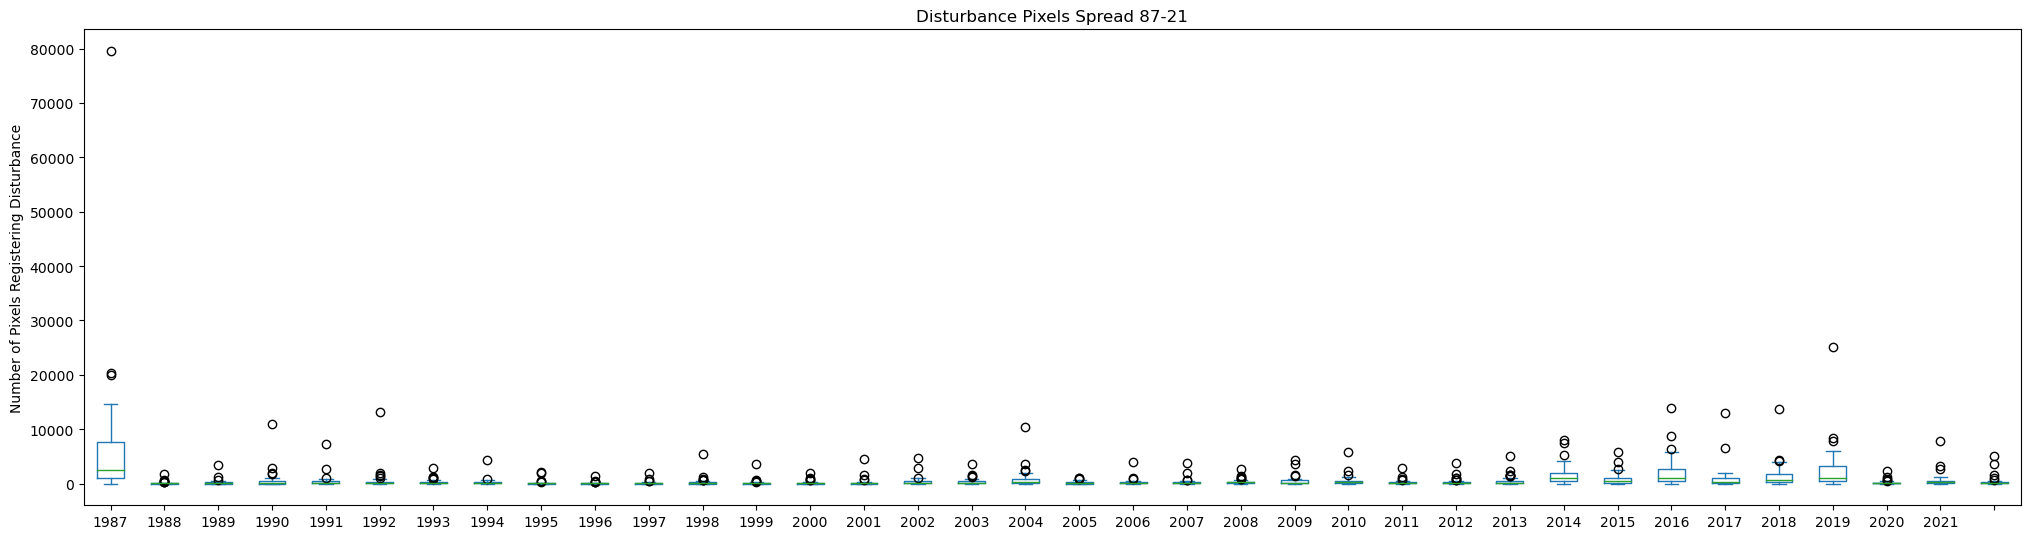

In [171]:
ax = df_B1_sorted.iloc[:, 30:].plot(kind='box', figsize=(25, 6.18), title='Disturbance Pixels Spread 87-21')
ax.set_ylabel(ylabel)

ax.set_xticklabels(years[2:]);

'yod_01986_norm_area'

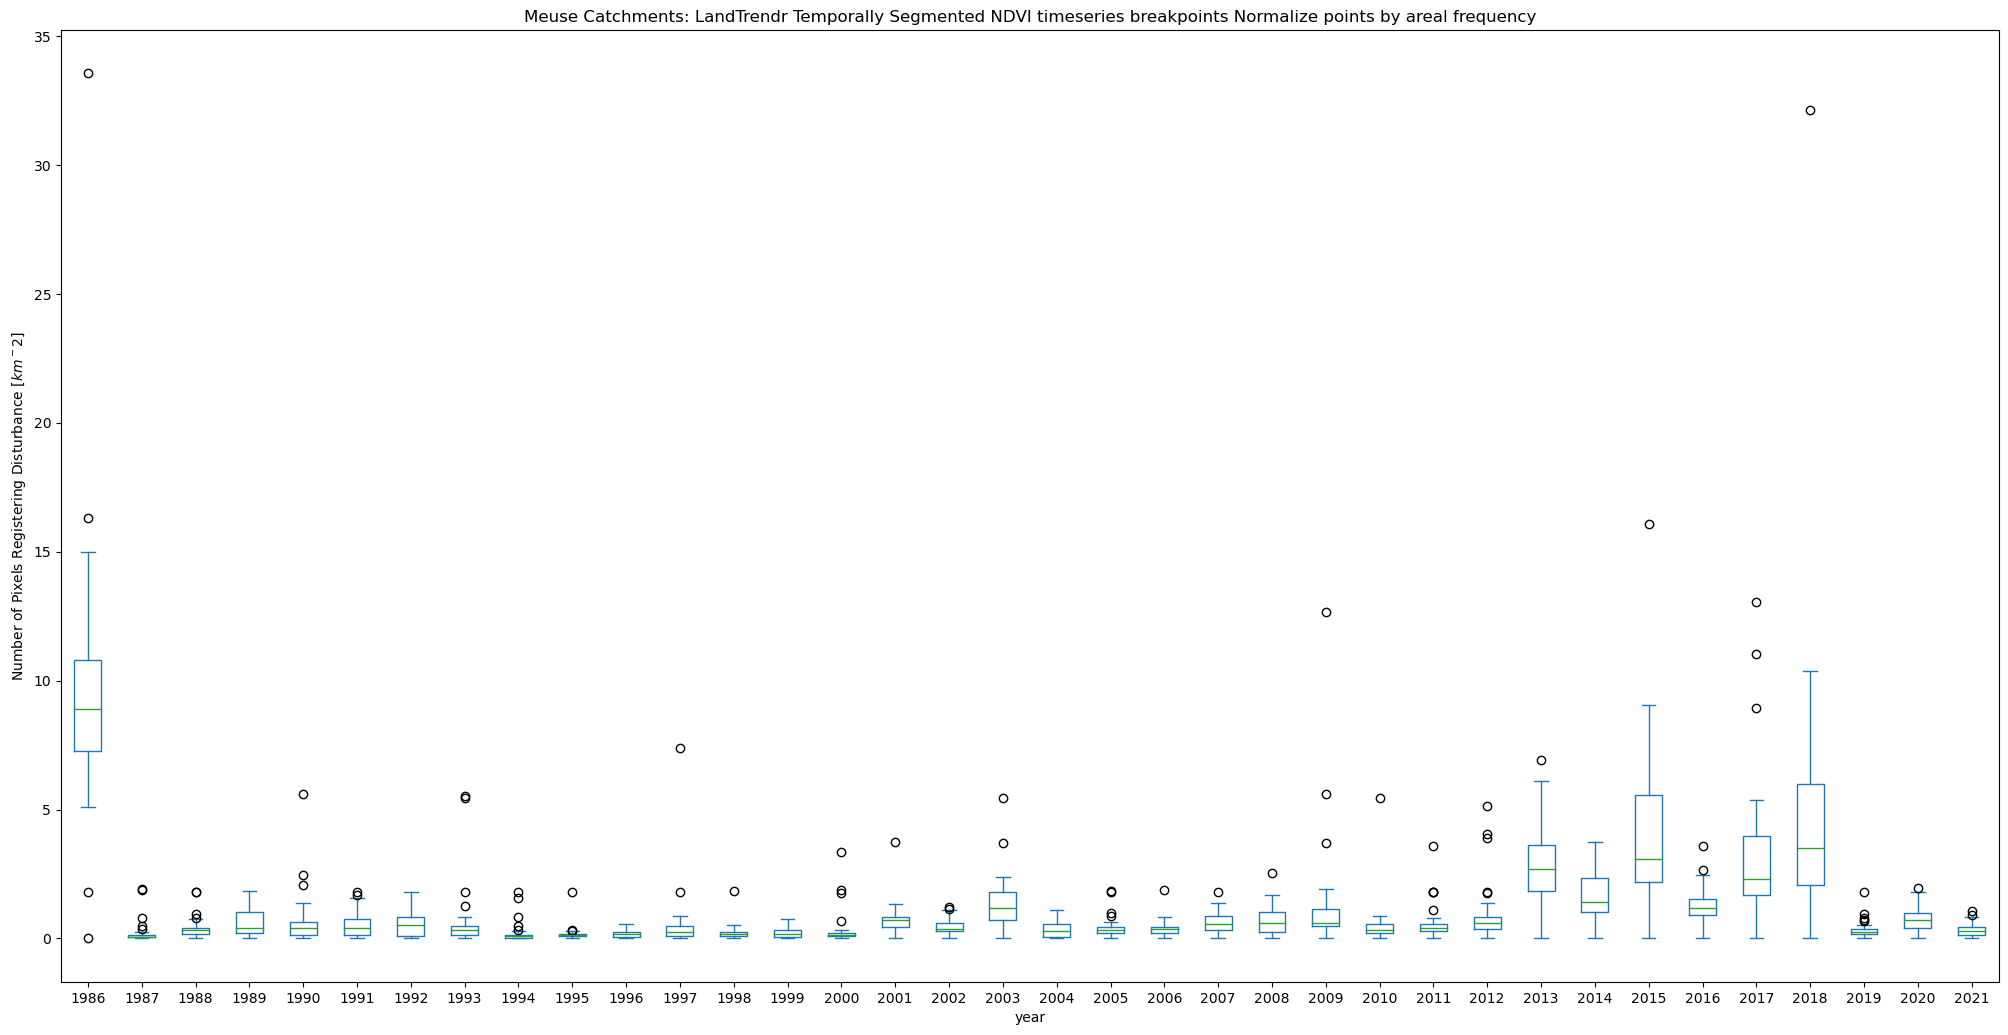

In [178]:
for key in disturbed_keys86:
    df_B1_sorted[key+'_norm_area'] = df_B1_sorted.loc[:, key]/(df_B1_sorted.area2[:]/(1000*1000))
#np.count_nonzero(df_B1_sorted.area2)
#np.count_nonzero(df_B1_sorted.iloc[:, 27])
ax = df_B1_sorted.iloc[:, 66:].plot(kind='box', figsize=(25, 12.36), title='Meuse Catchments: LandTrendr Temporally Segmented NDVI timeseries breakpoints Normalize points by areal frequency'); #normalise each year by the catchment area in sqkm
ax.set_xticklabels(years[1:])
ax.set_ylabel(f'{ylabel} [$km^{-2}$]')
ax.set_xlabel('year');
df_B1_sorted.keys()[66]

In [208]:
sorted_again = df_B1_sorted.sort_values('area_m2')
vals = sorted_again.GEE_id.values
ids = sorted_again.GEE_id.index

zipped = zip(ids, vals)
print(zipped)